In [1]:
import pandas as pd
df_train = pd.read_csv("train.csv")

In [2]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df_train.drop(['Cabin'], axis=1, inplace=True)

In [5]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [6]:
df_train['Embarked'].fillna('S', inplace=True)

In [7]:
embarked = {"Embarked": {"S":0,"C":1,"Q":2}}
df_train.replace(embarked,inplace=True)

In [8]:
# how='any' itu untuk jika salah satu nilai dalam example ada yang NaN maka drop, beda dengan
# how='all' ini untuk jika semua nilai dalam example NaN baru di drop, kalau masih ada setidaknya satu value dari example, tetap dikeep
df_train.dropna(inplace=True,how='any')

In [9]:
df_train['Fare'] = df_train['Fare'].astype(int)
df_train['Age'] = df_train['Age'].astype(int)

In [10]:
sex = {'Sex':{'male': 0, 'female':1}}
df_train.replace(sex,inplace=True)

In [11]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,0
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39,0,5,382652,29,2
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30,1


In [12]:
df_train = df_train.drop(['Name', 'PassengerId', 'Ticket'], axis=1)

In [13]:
df_train.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,1
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0
6,0,1,0,54,0,0,51,0


In [14]:
import sklearn.model_selection as ms
features = df_train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked' ]]
label = df_train['Survived']
X_train, X_test, y_train, y_test = ms.train_test_split(features,label,test_size=0.25,random_state=0)

In [15]:
import sklearn.naive_bayes as nb
import sklearn.metrics as met
gnb = nb.GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [16]:
y_prediksi = gnb.predict(X_test)
accuracy = met.accuracy_score(y_test,y_prediksi)
precision = met.precision_score(y_test,y_prediksi)
print('Accuracy', accuracy, 'Precision', precision)

Accuracy 0.770949720670391 Precision 0.7272727272727273


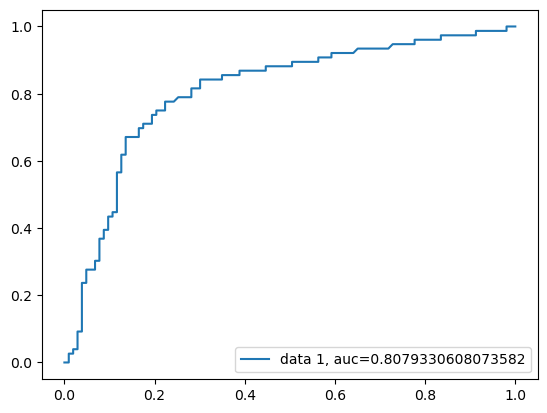

In [17]:
import matplotlib.pyplot as plt
# menggunakan predict_proba biar lebih detail aja, misal
# y_prediksi = mengembalikan nilai label = [0,1,1,0,0]
# kalau y_pred_proba = mengembalikan nilai masing2 label untuk setiap elemen = [[0.9,0,1],[0.2,0.8],...]
#::1 artinya ngambil semua, mau eksplisit aja
y_pred_proba = gnb.predict_proba(X_test)[::,1]
#_ adalah variabel, bisa diganti dengan nama lainnya, penggunaan _ cuman untuk mengatakan kalau kita gak gunakan variabelnya,
# dan harus diisi, kalau gak error
fp,tp,_=met.roc_curve(y_test,y_pred_proba)
auc = met.roc_auc_score(y_test,y_pred_proba)
plt.plot(fp,tp,label="data 1, auc="+str(auc))
# loc = 4 itu cuman tmpt posisi
plt.legend(loc=4)
plt.show()


KINERJA MODEL DITINGKAT

In [29]:
df_train1 = pd.read_csv("train.csv")
df_train1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [43]:
df_train1 = df_train1.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)
sex = {"Sex":{"male":0,"female":1}}
df_train1.replace(sex, inplace=True)
df_train1['Embarked'].fillna("S",inplace=True)
embarked = {"Embarked":{"S":0,"C":1,"Q":2}}
df_train1.replace(embarked,inplace=True)
df_train1


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,NaN,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


In [44]:
pria = df_train1['Age'].loc[df_train1['Sex']==0].mean()
wanita = df_train1['Age'].loc[df_train1['Sex']==1].mean()
print ('Pria=',pria, "Wanita=",wanita)

Pria= 30.72664459161148 Wanita= 27.915708812260537


In [45]:
df_train1['Age'].loc[(df_train1['Sex']==0) & (df_train1['Age'].isnull()==True)]=30.726
df_train1['Age'].loc[(df_train1['Sex']==1) & (df_train1['Age'].isnull()==True)]=27.916

C:\Users\ASUS\AppData\Local\Temp\ipykernel_848\2901700427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1['Age'].loc[(df_train1['Sex']==0) & (df_train1['Age'].isnull()==True)]=30.726
C:\Users\ASUS\AppData\Local\Temp\ipykernel_848\2901700427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1['Age'].loc[(df_train1['Sex']==1) & (df_train1['Age'].isnull()==True)]=27.916


<Axes: >

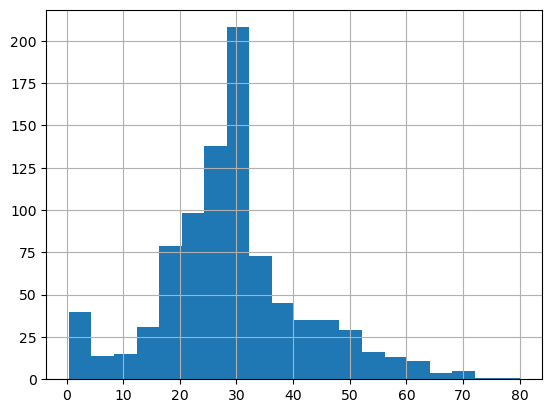

In [57]:
# 20 disini artinya dibagi menjadi 20 kelompok
df_train1['Age'].hist(bins=20)

<Axes: >

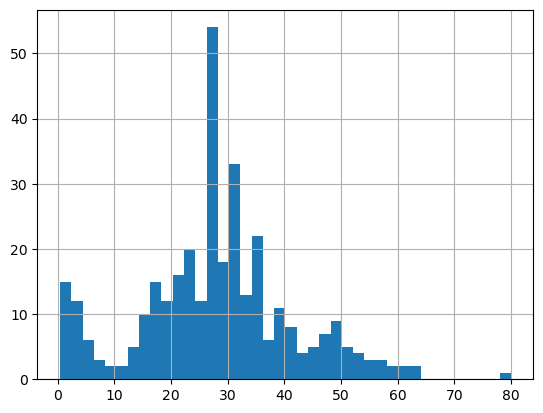

In [58]:
df_train1['Age'].loc[df_train1['Survived']==1].hist(bins=40)

In [62]:
umur = [0,5,15,25,30,35,45,50,200]
# kalau 201, muncul NaN
umur_label=['0-5','5-15','15-25','25-30','30-35','35-45','45-50','>50']
kelompok_umur = pd.cut(df_train1['Age'],umur,labels=umur_label)
df_train1['KelompokUmur']= kelompok_umur
# ini hanya sekedar angka untuk komputer saja, seperti kelompok umur 0-5 dibuat angka 0, 5-15 dibuat 1
df_train1['KelompokUmurKode']=df_train1['KelompokUmur'].cat.codes
df_train1['KelompokUmur'].value_counts()

KelompokUmur
15-25    218
30-35    212
25-30    161
35-45    114
>50       64
0-5       44
5-15      39
45-50     39
Name: count, dtype: int64

<Axes: >

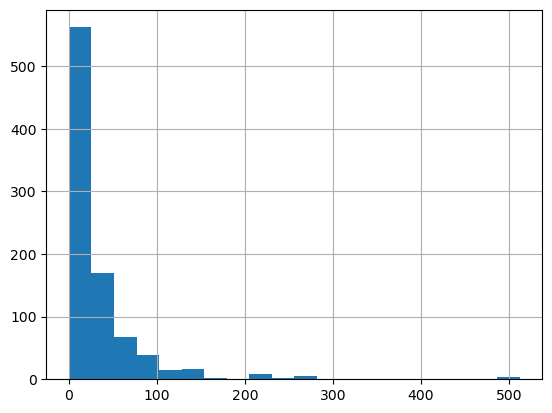

In [63]:
df_train1['Fare'].hist(bins=20)

In [64]:
harga = [0,10,30,35,80,1000]
harga_label=['0-10','10-30','30-35','35-80','>80']
kelompok_harga = pd.cut(df_train1['Fare'],harga,labels=harga_label)
df_train1['KelompokHarga']= kelompok_harga
df_train1['KelompokHargaKode']=df_train1['KelompokHarga'].cat.codes
df_train1['KelompokHarga'].value_counts()

KelompokHarga
0-10     321
10-30    321
35-80    124
>80       74
30-35     36
Name: count, dtype: int64

In [68]:
# 1 rombongan
jumlahOrang = df_train1['SibSp'].astype(int)+df_train1['Parch'].astype(int)+1
df_train1['JumlahOrang']=jumlahOrang.astype(int)

In [69]:
df_train1['JumlahOrang']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: JumlahOrang, Length: 891, dtype: int32

In [70]:
df_train1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,KelompokUmur,KelompokUmurKode,KelompokHarga,KelompokHargaKode,JumlahOrang
0,0,3,0,22.000,1,0,7.2500,0,15-25,2,0-10,0,2
1,1,1,1,38.000,1,0,71.2833,1,35-45,5,35-80,3,2
2,1,3,1,26.000,0,0,7.9250,0,25-30,3,0-10,0,1
3,1,1,1,35.000,1,0,53.1000,0,30-35,4,35-80,3,2
4,0,3,0,35.000,0,0,8.0500,0,30-35,4,0-10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000,0,0,13.0000,0,25-30,3,10-30,1,1
887,1,1,1,19.000,0,0,30.0000,0,15-25,2,10-30,1,1
888,0,3,1,27.916,1,2,23.4500,0,25-30,3,10-30,1,4
889,1,1,0,26.000,0,0,30.0000,1,25-30,3,10-30,1,1


In [73]:
features1=df_train1[['Pclass','Sex','KelompokUmurKode','KelompokHargaKode','JumlahOrang','Embarked']]
label1=df_train1['Survived']
X_train,X_test,y_train,y_test= ms.train_test_split(features1,label1,test_size=0.25,random_state=0)

In [74]:
gnb.fit(X_train,y_train)
y_prediksi1=gnb.predict(X_test)

In [76]:
accuracy1=met.accuracy_score(y_test,y_prediksi1)
precision1=met.precision_score(y_test,y_prediksi1)
print('accuracy=',accuracy1,"precision=",precision1)

accuracy= 0.8161434977578476 precision= 0.7311827956989247


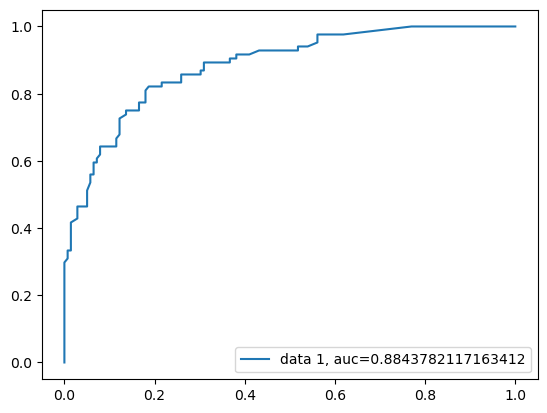

In [77]:
import matplotlib.pyplot as plt
# menggunakan predict_proba biar lebih detail aja, misal
# y_prediksi = mengembalikan nilai label = [0,1,1,0,0]
# kalau y_pred_proba = mengembalikan nilai masing2 label untuk setiap elemen = [[0.9,0,1],[0.2,0.8],...]
#::1 artinya ngambil semua, mau eksplisit aja
y_pred_proba1 = gnb.predict_proba(X_test)[::,1]
#_ adalah variabel, bisa diganti dengan nama lainnya, penggunaan _ cuman untuk mengatakan kalau kita gak gunakan variabelnya,
# dan harus diisi, kalau gak error
fp,tp,_=met.roc_curve(y_test,y_pred_proba1)
auc = met.roc_auc_score(y_test,y_pred_proba1)
plt.plot(fp,tp,label="data 1, auc="+str(auc))
# loc = 4 itu cuman tmpt posisi
plt.legend(loc=4)
plt.show()
